In [153]:
directory = ["Dataset_complete/Trackpictures/nice_weather/nice_weather_thusis_filisur_20200827_pixelated/",
        "Dataset_complete/Trackpictures/nice_weather/nice_weather_filisur_thusis_20200824_pixelated/",
       "Dataset_complete/Trackpictures/night/night_thusis_filisur_20200828/",
       "Dataset_complete/Trackpictures/bad_weather/bad_weather_thusis_filisur_20200829_pixelated/"]

files = ['nice_weather_thusis_filisur.csv', 'nice_weather_filisur_thusis.csv','night_thusis_filisur.csv',
         'bad_weather_thusis_filisur.csv']

In [155]:
import os
import piexif
import csv

for dir_,file_ in zip(directory,files):#print(dir_)
    with open(file_,'w') as f1:
        writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
        for filename in os.listdir(dir_):
            if filename.endswith(".jpg"):
                input_ = []
                input_.append(dir_+filename)
                exif_dict = piexif.load(dir_+filename)
                for tag in exif_dict["GPS"]:
                    if(piexif.TAGS["GPS"][tag]["name"] in ["GPSLatitude","GPSLongitude","GPSAltitude"]):
                        input_.append(exif_dict["GPS"][tag][0]/1000000.0)
                writer.writerow(input_)



InvalidImageDataError: Given file is neither JPEG nor TIFF.

In [156]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

for file_ in files:
    scaler = StandardScaler()
    df = pd.read_csv(file_,header=None,sep="\t")
    data = scaler.fit_transform(df.iloc[:,1:3].values)
    df[4] = data[:,0]
    df[5] = data[:,1]
    df.columns = ['path', 'latitude', 'longitude', 'altitude', 'std_latitude','std_longitude']
    df.to_csv(file_,index=False,sep="\t")

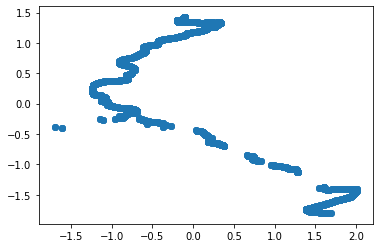

In [100]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])

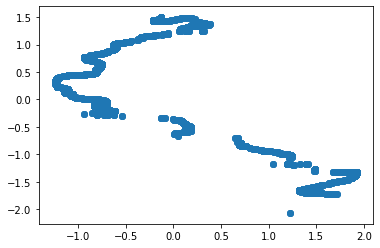

In [98]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])